In [33]:
# Import Modules
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [34]:
# Define Constants
# CATEGORIES = ['Danger', 'No Danger']
SAVED_MODEL_PATH = 'saved\models\my_model'
IMG_SIZE = 180

In [35]:
# Define a simple sequential model
def create_model():
  
  # Define Models
  model = Sequential()

  # Add layers
  model.add(Conv2D(64, (3, 3), input_shape = (180, 180, 1)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

  model.add(Dense(64))

  model.add(Dense(1))
  model.add(Activation('sigmoid'))

  model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

  return model

In [36]:
# Create a basic model instance
model = create_model()
model.load_weights(SAVED_MODEL_PATH)

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 178, 178, 64)      640       
                                                                 
 activation_12 (Activation)  (None, 178, 178, 64)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 89, 89, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 activation_13 (Activation)  (None, 87, 87, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                  

In [54]:
# Define index by random number
index = 1
DATADIR = '6.jpg'

# Prep the image
img = cv2.imread(DATADIR, cv2.IMREAD_GRAYSCALE)
img.shape

(320, 520)

In [55]:
resized_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

test_example = np.array(resized_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

result = model.predict(test_example)

(180, 180)


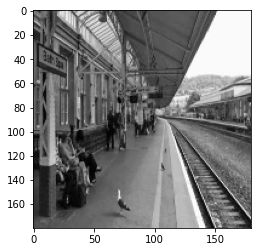

In [56]:
print(resized_img.shape)
plt.imshow(resized_img, cmap='gray')
plt.show()

In [57]:
print(result)

[[1.]]


In [1]:
from predict import AIModel
m = AIModel()
print(m.predictInstance("static/trains/7.jpg"))

True
